In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Const
c = 3*10**(8) # light velocity
#c=1

In [3]:
# Parameters
n_a = 3
n_b = 3.5
a = 1
b = n_a * a / n_b
#print(b)

n_out = 1
m_in = 81

In [4]:
# Transfer matrix

# a - thicness of layer
# n - refractive index of layer
# k = n*k_0
# |k| = 2 pi / lambda

def trans_matrix_a(a,n,omega):
    k = n/c * omega
    T_a = np.array([[np.cos(k*a),1j/n*np.sin(k*a)],[1j*n*np.sin(k*a),np.cos(k*a)]])
    return T_a

In [5]:
# transition matrix across m layer structure
def getMatrix(omega,m):
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)
    T = np.dot(T_b,T_a) # transition matrix across one ab layer
    
    T_m = T
    for i in range(m-1):
        T_m = np.dot(T_m,T)
    return T_m

# omega = 2 * np.pi * c / 12
# T_m = getMatrix(omega)

# t11 = T_m[0,0]
# t12 = T_m[0,1]
# t21 = T_m[1,0]
# t22 = T_m[1,1]

In [6]:
def reflection_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = n_right*t11 + n_left*n_right*t12 - t21 - n_left*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return num/denom

# rs = reflection_coeff(n_out,n_out,T_m)
# print(rs)

In [7]:
def transmission_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = t12*t21 - t11*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return 2*n_left * num/denom

# ts = transmission_coeff(n_out,n_out,T_m)
# print(ts)

In [8]:
x = np.linspace(2*np.pi*c/(4*n_a*a)-50000000,2*np.pi*c/(4*n_a*a)+50000000,2000)

ref_coeffs = []
trans_coeffs = []
for i in x:
    matrix = getMatrix(i,m_in)
    ref_coeffs.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffs.append(transmission_coeff(n_out, n_out, matrix))
    
ref_coeffs4 = []
trans_coeffs4 = []
for i in x:
    matrix = getMatrix(i,4)
    ref_coeffs4.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffs4.append(transmission_coeff(n_out, n_out, matrix))
    
ref_coeffs12 = []
trans_coeffs12 = []
for i in x:
    matrix = getMatrix(i,12)
    ref_coeffs12.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffs12.append(transmission_coeff(n_out, n_out, matrix))

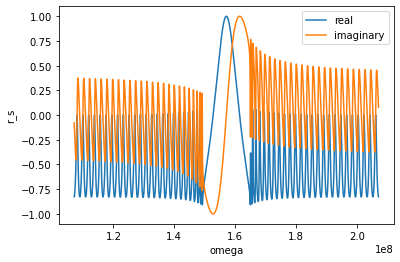

In [9]:
plt.plot(x,np.real(ref_coeffs),label='real')
plt.plot(x,np.imag(ref_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('r_s')
plt.legend()

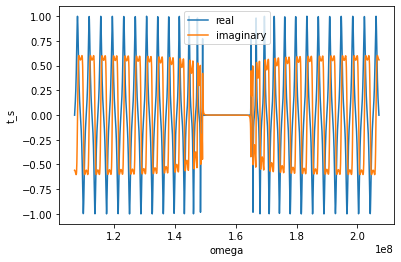

In [10]:
plt.plot(x,np.real(trans_coeffs),label='real')
plt.plot(x,np.imag(trans_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('t_s')
plt.legend()

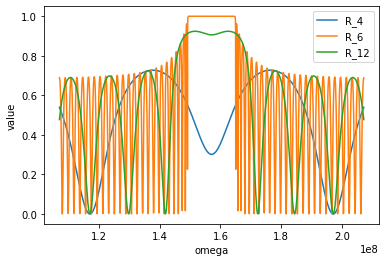

In [11]:
R = []
T = []
R4 = []
T4 = []
R12 = []
T12 = []

for i in range(len(ref_coeffs)):
    R.append(np.abs(ref_coeffs[i])*np.abs(ref_coeffs[i]))
    R4.append(np.abs(ref_coeffs4[i])*np.abs(ref_coeffs4[i]))
    R12.append(np.abs(ref_coeffs12[i])*np.abs(ref_coeffs12[i]))
    
for i in range(len(trans_coeffs)):
    T.append(np.abs(trans_coeffs[i])*np.abs(trans_coeffs[i])*n_out/n_out)
    T4.append(np.abs(trans_coeffs4[i])*np.abs(trans_coeffs4[i])*n_out/n_out)
    T12.append(np.abs(trans_coeffs12[i])*np.abs(trans_coeffs12[i])*n_out/n_out)

plt.plot(x,R4,label='R_4')
plt.plot(x,R,label='R_6')
plt.plot(x,R12,label='R_12')
# plt.plot(x,T4,label='T_4')
# plt.plot(x,T,label='T_6')
# plt.plot(x,T12,label='T_12')
plt.xlabel('omega')
plt.ylabel('value')
plt.legend()

Mikrownęka

In [19]:
# transition matrix across m layer structure
def getMatrixMC(omega,m):   
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega) 
    # prawa strona  
    T_ba = np.dot(T_a,T_b) # transition matrix across one ba layer
    T_r = np.linalg.matrix_power(T_ba,m)
    # mikrownęka
    #T = T_b
    # lewa strona
    T_ab = np.dot(T_b,T_a) # transition matrix across one ab layer
    T_l = np.linalg.matrix_power(T_ab,m)

    T_m = np.linalg.multi_dot([T_r,T_b,T_l])
        
    return T_m

In [20]:
xMC = np.linspace(2*np.pi*c/(4*n_a*a)-10000000,2*np.pi*c/(4*n_a*a)+10000000,10000)

ref_coeffsMC = []
trans_coeffsMC = []
ref_coeffsMC4 = []
trans_coeffsMC4 = []
ref_coeffsMC12 = []
trans_coeffsMC12 = []

for i in xMC:
    matrix = getMatrixMC(i,m_in)
    ref_coeffsMC.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffsMC.append(transmission_coeff(n_out, n_out, matrix))
    
for i in xMC:
    matrix = getMatrixMC(i,4)
    ref_coeffsMC4.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffsMC4.append(transmission_coeff(n_out, n_out, matrix))
    
for i in xMC:
    matrix = getMatrixMC(i,12)
    ref_coeffsMC12.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffsMC12.append(transmission_coeff(n_out, n_out, matrix))

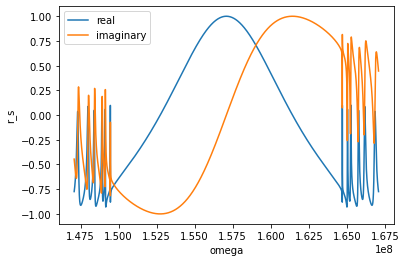

In [21]:
plt.plot(xMC,np.real(ref_coeffsMC),label='real')
plt.plot(xMC,np.imag(ref_coeffsMC), label='imaginary')
plt.xlabel('omega')
plt.ylabel('r_s')
plt.legend()

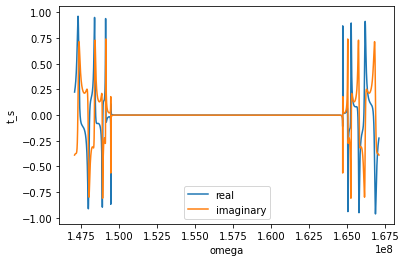

In [22]:
plt.plot(xMC,np.real(trans_coeffsMC),label='real')
plt.plot(xMC,np.imag(trans_coeffsMC), label='imaginary')
plt.xlabel('omega')
plt.ylabel('t_s')
plt.legend()

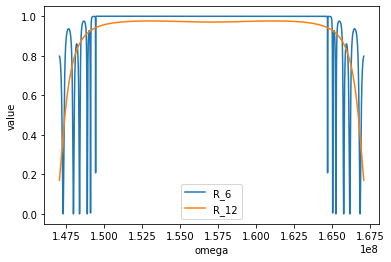

In [23]:
R_MC = []
T_MC = []
R_MC4 = []
T_MC4 = []
R_MC12 = []
T_MC12 = []

for i in range(len(ref_coeffsMC)):
    R_MC.append(np.abs(ref_coeffsMC[i])*np.abs(ref_coeffsMC[i]))
    R_MC4.append(np.abs(ref_coeffsMC4[i])*np.abs(ref_coeffsMC4[i]))
    R_MC12.append(np.abs(ref_coeffsMC12[i])*np.abs(ref_coeffsMC12[i]))
    
for i in range(len(trans_coeffsMC)):
    T_MC.append(np.abs(trans_coeffsMC[i])*np.abs(trans_coeffsMC[i])*n_out/n_out)
    T_MC4.append(np.abs(trans_coeffsMC4[i])*np.abs(trans_coeffsMC4[i])*n_out/n_out)
    T_MC12.append(np.abs(trans_coeffsMC12[i])*np.abs(trans_coeffsMC12[i])*n_out/n_out)

#plt.plot(xMC,R_MC4,label='R_4')
plt.plot(xMC,R_MC,label='R_6')
plt.plot(xMC,R_MC12,label='R_12')
#plt.plot(xMC,T_MC4,label='T_4')
#plt.plot(xMC,T_MC,label='T')
#plt.plot(xMC,T_MC12,label='T_12')
plt.xlabel('omega')
plt.ylabel('value')
plt.legend()